# 한글 Word2Vec 만들기

In [1]:
!pip install konlpy > /dev/null

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
import numpy as np


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt",  sep='\t')

In [4]:
df.head(2)

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1


# 데이터 전처리

In [5]:
df.shape

(200000, 3)

In [6]:
#중복 여부 확인
df.document.nunique()

194543

In [7]:
#중복데이터 배제
df.drop_duplicates(subset=['document'], inplace=True)
df.shape

(194544, 3)

In [8]:
# Null 데이터 확인
df.isnull().sum()
df.dropna(how='any', inplace=True)
df.shape

(194543, 3)

In [9]:
# 한글과 공백 이외에는 제거
df['document'] = df.document.str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '')
df.head(2)

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1


In [10]:
df['document'].replace('', np.nan, inplace=True)
df.document.isnull().sum()

491

In [11]:
df.dropna(how='any', inplace=True)
df.shape

(194052, 3)

## 불용어 사전을 활용하여 불용어 처리

In [ ]:
from google.colab import files
uploaded = files.upload()
textfile = list(uploaded.keys())[0]

In [21]:
sdf = pd.read_csv(textfile, sep='\s+', header=None)
sdf.head(2)

,0,1,2
0,이,VCP,0.018280
1,있,VA,0.011699


In [22]:
stopwords = set(sdf[0])
len(stopwords)

94

In [13]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

- 한글 형태소 분석

In [14]:
okt = Okt()

In [16]:
from tqdm.notebook import tqdm
tokenized_data = []
for sentence in tqdm(df.document):
    morphs = okt.morphs(sentence.strip(), stem=True)
    temp_list = [word for word in morphs if word not in stopwords]
    tokenized_data.append(temp_list) 

  0%|          | 0/194052 [00:00<?, ?it/s]

리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.996325727124688


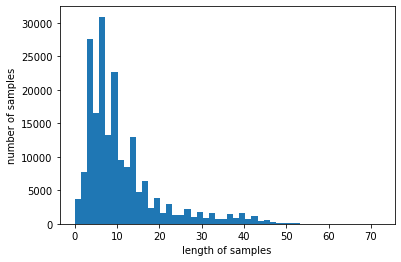

In [17]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

## Word2Vect 훈련시키기
- size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
- window = 컨텍스트 윈도우 크기
- min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
- workers = 학습을 위한 프로세스 수
- sg = 0은 CBOW, 1은 Skip-gram.

In [18]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [19]:
model.wv.vectors.shape

(16466, 100)

In [20]:
print(model.wv.most_similar("최민식"))

[('한석규', 0.8653277158737183), ('안성기', 0.8587932586669922), ('이정재', 0.8500141501426697), ('설경구', 0.8370628356933594), ('박중훈', 0.8368259072303772), ('주진모', 0.836775541305542), ('류덕환', 0.8357976675033569), ('김승우', 0.8350218534469604), ('채민서', 0.8339977860450745), ('이민호', 0.8339601755142212)]


In [21]:
print(model.wv.most_similar("히어로"))

[('슬래셔', 0.8634051084518433), ('무협', 0.8487778902053833), ('호러', 0.8412623405456543), ('느와르', 0.8400012850761414), ('블랙', 0.8163556456565857), ('물', 0.814673125743866), ('무비', 0.8083410263061523), ('물의', 0.7996591329574585), ('정통', 0.7924251556396484), ('헐리웃', 0.7810403108596802)]
